In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
# plt.rcParams['font.sans-serif'] = ['SimHei']  
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [91]:
w1 = np.array([
    [-0.4,0.58,0.089],
    [-0.31,0.27,-0.04],
    [-0.38,0.055,-0.035],
    [-0.15,0.53,0.011],
    [-0.35,0.47,0.034],
    [-0.17,0.69,0.1],
    [-0.011,0.55,-0.18],
    [-0.27,0.61,0.12],
    [-0.065,0.49,0.0012],
    [-0.12,0.054,-0.063]])
w2 = np.array([
    [0.8,1.6,-0.014],
    [1.1,1.6,0.48],
    [-0.44,-0.41,0.32],
    [0.047,-0.45,1.4],
    [0.28,0.35,3.1],
    [-0.39,-0.48,0.11],
    [0.34,-0.079,0.14],
    [-0.3,-0.22,2.2],
    [1.1,1.2,-0.46],
    [0.18,0.11,-0.49]])
w3 = np.array([
    [1.58,2.32,-5.8],
    [0.67,1.58,-4.78],
    [1.04,1.01,-3.63],
    [-1.49,2.18,-3.39],
    [-0.41,1.21,-4.73],
    [1.39,3.61,2.87],
    [1.2,1.4,-1.89],
    [-0.92,1.44,-3.22],
    [0.45,1.33,-4.38],
    [-0.76,0.84,-1.96]])
test1 = np.array([-0.7,0.58,0.089]).reshape(3,1)
test2 = np.array([0.047,-0.4,1.04]).reshape(3,1)

In [92]:
# matlab中cov默认列向量,numpy默认行向量,因此需指定`rowvar=False`
s1 = np.cov(w2,rowvar=False);m1 = np.mean(w2,axis=0);
s2 = np.cov(w3,rowvar=False);m2 = np.mean(w3,axis=0);
sw = s1 + s2
# numpy中左除A\b,可使用`np.linalg.solve(A,b)`或`np.linalg.lstsq(A,b)`
w = np.linalg.solve(sw,m1-m2)
# 判别函数及阈值y_0,阈值取两类心投影连线的中点
y0 = w.T.dot(m1+m2)/2

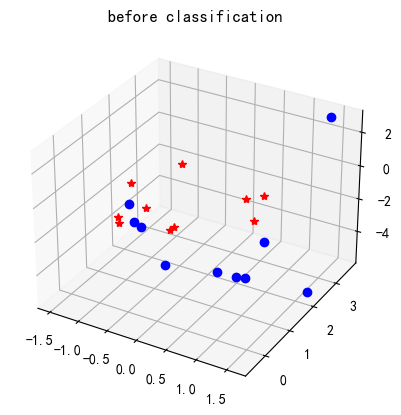

In [93]:
ax1 = plt.axes(projection='3d')
ax1.plot3D(w2[:,0],w2[:,1],w2[:,2],'r*')
ax1.plot3D(w3[:,0],w3[:,1],w3[:,2],'bo')
ax1.title.set_text('before classification')

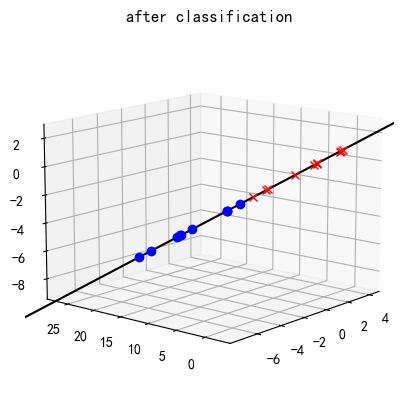

In [94]:
z1,z2 = w.T.dot(w2.T), w.T.dot(w3.T)
xmin = np.min(np.minimum(w2[:,0],w3[:,0]))
xmax = np.max(np.maximum(w2[:,0],w3[:,0]))
t = np.linspace(xmin-1,xmax+1,100)
ax2 = plt.axes(projection='3d')
ax2.plot3D(30*t,30*t*w[1]/w[0],30*t*w[2]/w[0],'k')
ax2.plot3D(z1*w[0],z1*w[1],z1*w[2],'rx')
ax2.plot3D(z2*w[0],z2*w[1],z2*w[2],'bo')
ax2.set_xlim(-7.97,4.67)
ax2.set_ylim(-3.6,28.3)
ax2.set_zlim(-9.23,2.74)
ax2.view_init(elev=13, azim=-140, roll=0)
ax2.title.set_text('after classification')

In [95]:
y1, y2 = w.T.dot(test1), w.T.dot(test2)

if y1 > y0:
    print('test1 is from w2')
else:
    print('test1 is from w3')

if y2 > y0:
    print('test2 is from w2')
else:
    print('test2 is from w3')

test1 is from w2
test2 is from w2
